## a-1D SOM

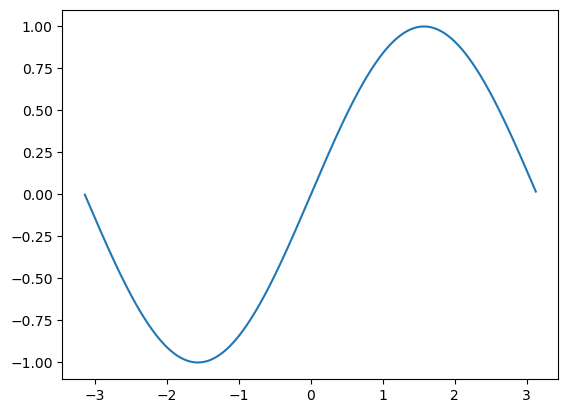

In [1015]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3.14,3.14,6.28/400)
trainingset = np.zeros((2,400))
for i in range(400):
    trainingset[0][i] = x[i]
    trainingset[1][i] = np.sin(x[i])
plt.plot(trainingset[0],trainingset[1])

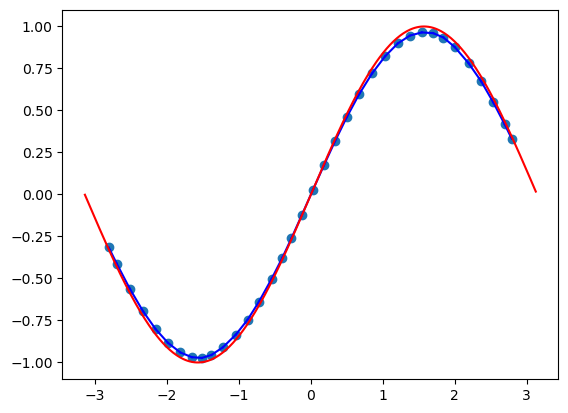

In [1023]:
import random
def Gause(i,j,sigma):
    return np.exp(-np.linalg.norm([i-j], ord=2)**2/(2*sigma**2))
N = 36
M = 400
weight_init = 0.02*np.random.rand(N,2)-0.01
weight = weight_init
K=2000
n0 = 0.1
tau=K
for i in range(K):
    sigma = 18*np.exp(-i*np.log(18)/K)
    idx = random.randint(0,M-1)
    vx = trainingset[:,idx]
    nk = np.argmin(np.sum((vx-weight)**2,axis=1))
    for j in range(N):
        weight[j] += n0*np.exp(-i/tau)*Gause(nk,j,sigma)*(vx-weight[j])

plt.scatter(weight[:,0],weight[:,1])
for j in range(N-1):
    plt.plot([weight[j][0],weight[j+1][0]],[weight[j][1],weight[j+1][1]],c='b')
plt.plot(trainingset[0],trainingset[1], c='r')

## b-2D SOM

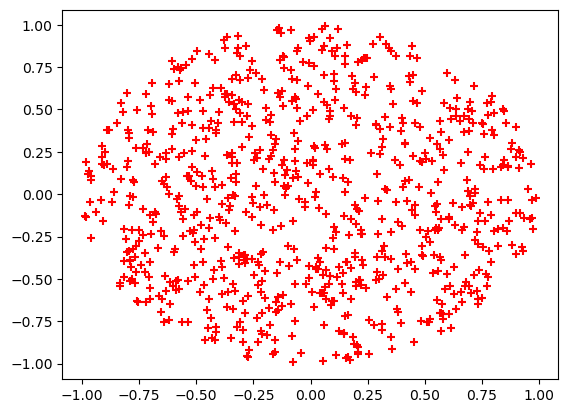

In [1024]:
import numpy as np
import math

def GenCircleRandomPts(r, pt_cnt):        
        x_list = []
        y_list = []
        for k in range(pt_cnt):
            #angular theta [0,2*pi]
            random_theta = random.random() * math.pi * 2
            #length from center
            random_r = math.sqrt(random.random()) * r
            x = math.cos(random_theta) * random_r
            y = math.sin(random_theta) * random_r
            x_list.append(x)
            y_list.append(y)
        return x_list, y_list
x,y = GenCircleRandomPts(1, 800)
trainingset = np.zeros((2,800))
for i in range(800):
    trainingset[0][i] = x[i]
    trainingset[1][i] = y[i]
plt.scatter(trainingset[0],trainingset[1],marker='+',c='r')

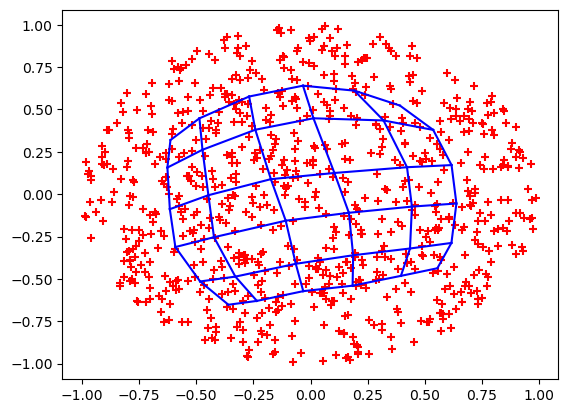

In [1047]:
import random

N = 36
M = 800
weight_init = 0.02*np.random.rand(N,2)-0.01
weight = weight_init
K=600
n0 = 0.1
tau = K
for i in range(K):
    sigma = (2*np.sqrt(2))*np.exp(-i*np.log(3*np.sqrt(2))/K)
    idx = random.randint(0,M-1)
    vx = trainingset[:,idx]
    nk = np.argmin(np.sum((vx-weight)**2,axis=1))
    nk2d = np.array([nk//6, nk%6])
    for j in range(N):
        j2d = np.array([j//6, j%6])
        weight[j] += n0*np.exp(-i/tau)*Gause(nk2d,j2d,sigma)*(vx-weight[j])

for i in range(6):
    for j in range(5):
        plt.plot([weight[i*6+j][0],weight[i*6+j+1][0]],[weight[i*6+j][1],weight[i*6+j+1][1]],c='b')
        plt.plot([weight[i+j*6][0],weight[i+(j+1)*6][0]],[weight[i+j*6][1],weight[i+(j+1)*6][1]],c='b')
plt.scatter(trainingset[0],trainingset[1],marker='+',c='r')